In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [2]:
def potential(v):

    for i in range(N):
        for j in range(N):
            if (i-20)**2+(j-15)**2 <= 49:
                v[i][j]=0
            elif (i-40)**2+(j-87)**2 <= 64:
                v[i][j]=0
            elif (i-88)**2+(j-61)**2 <=81:
                v[i][j]=0

            
    return v

In [3]:
def lanczos(v0,m,q):
    w = []
    beta = [0]
    v = [v0]
    wp = []
    alpha = []
    w0p = Hx(v0, q, phi)
    wp.append(w0p)
    alpha0 = np.conj(w0p.T) @ v0
    alpha.append(alpha0)
    w0 = w0p - alpha0 * v0
    w.append(w0)
    for j in range(1,m):
        betaj = np.linalg.norm(w[j-1])
        beta.append(betaj)
        vj = w[j-1]/beta[j]
        v.append(vj)
        wjp = Hx(v[j], q, phi)
        wp.append(wjp)
        alphaj = np.conj(wp[j].T) @ v[j]
        alpha.append(alphaj)
        wj = wp[j] - alpha[j] * v[j] - beta[j] * v[j-1]
        w.append(wj)   
        
    v = np.array(v)
    V = v.T
    Teigenvals, Teigenvecs = eigh_tridiagonal(alpha,beta[1:])
    groundstate_eigenval = Teigenvals[0]
    groundstate_eigenvec = Teigenvecs[:,0]
    print(groundstate_eigenval)
    return V @ groundstate_eigenvec   
    
    
    
    

In [4]:
N = 128
xy1 = np.mgrid[0:N,0:N]
xy = xy1.reshape(2,-1)
xp = np.roll(xy1,-1,axis=1).reshape(2,-1)
xm = np.roll(xy1,1,axis=1).reshape(2,-1)
yp = np.roll(xy1,-1,axis=2).reshape(2,-1)
ym = np.roll(xy1,1,axis=2).reshape(2,-1)

def Hx(x,q,phi):

    x = x.reshape(int(np.sqrt(len(x))),-1)
    ax = np.zeros(x.shape)


    ax[xy[0,:],xy[1,:]] = -(-4*x[xy[0,:],xy[1,:]] + x[xp[0,:],xp[1,:]] + x[xm[0,:],xm[1,:]] +  x[yp[0,:],yp[1,:]] + x[ym[0,:],ym[1,:]])+q*phi[xy[0,:],xy[1,:]]*x[xy[0,:],xy[1,:]] 

    #reset boundary
    ax[0,:] = 0
    ax[:,0] = 0
    ax[N-1,:] = 0
    ax[:,N-1] = 0

    return ax.flatten()

    

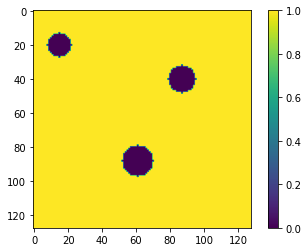

In [5]:
#Creating potential
phi = np.ones((N,N))
phi = potential(phi)

X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
Z = phi[X][Y]
fig, ax = plt.subplots()

plt.imshow(Z)
plt.colorbar()
plt.show()


In [6]:
#Create starting v0
v0 = np.ones((N,N))
v0 = potential(v0)
v0 = v0/np.linalg.norm(v0)
v0 = v0.flatten()

In [7]:
charge = -.01
iterations = 30

for i in range(iterations):
    
    result = lanczos(v0,10,charge)
    v0 = result/np.linalg.norm(result)


-0.009110920431823117
-0.008700601971756818
-0.008252876147318806
-0.007997836526854138
-0.008050752818856402
-0.007982193884455344
-0.008081780390077203
-0.008034976335177007
-0.008131678850704002
-0.00810274824442647
-0.008179982352520406
-0.00816631337499421
-0.008221480269346585
-0.00821845416005368
-0.008254744720408
-0.008257021394499846
-0.008279370586906249
-0.008283021793958094
-0.00829608527862159
-0.008299270457928092
-0.008306639381392946
-0.008308919805387786
-0.008313004874335055
-0.008314508853770315
-0.008316774751518097
-0.008317741475288166
-0.008319020820509296
-0.008319646795606542
-0.008320393436459992
-0.008320809459882282


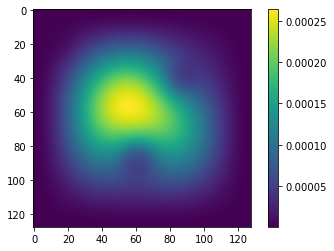

In [8]:
wavefunction = np.reshape(v0, (N,N))
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
wavefunction = wavefunction[X][Y]
fig, ax = plt.subplots()

plt.imshow(wavefunction**2)
plt.colorbar()
plt.show()
